In [286]:
%tensorflow_version 2.x 

In [287]:
from tensorflow import keras

In [288]:
keras.__version__

'2.4.0'

In [289]:
import tensorflow as tf

In [290]:
tf.__version__

'2.3.0'

In [291]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [292]:
# x_train -> images for training = 60K
# y_train -> labels for training = 60K
# x_test -> images for testing = 10K
# y_test -> labels for testing = 10K

In [293]:
x_train.shape

(60000, 28, 28)

In [294]:
"""
(60000, 28, 28, 3) - for RGB images
"""

'\n(60000, 28, 28, 3) - for RGB images\n'

In [295]:
y_train.shape
# 60000 = number of labels

(60000,)

In [296]:
import matplotlib.pyplot as plt

5


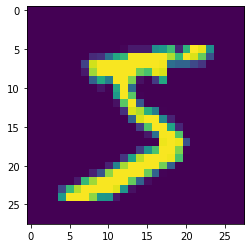

In [297]:
plt.imshow(x_train[0])
print(y_train[0])

3


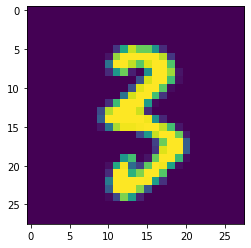

In [298]:
plt.imshow(x_train[45000])
print(y_train[45000])

In [299]:
""" Data Pre-Processing

Images: Scaling (using MinMaxScaling)
Labels: Categorical (OneHotEncoding using to_categorical function)

"""

' Data Pre-Processing\n\nImages: Scaling (using MinMaxScaling)\nLabels: Categorical (OneHotEncoding using to_categorical function)\n\n'

In [300]:
x_train = x_train / 255.0

In [301]:
y_train = keras.utils.to_categorical(y_train)

In [302]:
x_test = x_test / 255.0

In [303]:
y_test0 = y_test
y_test = keras.utils.to_categorical(y_test)

In [304]:
model = keras.models.Sequential()

# Input Layer

# Flatten the input images

model.add(keras.layers.Flatten( input_shape = (28, 28) ))


model.add(keras.layers.Dense(512, activation=keras.activations.relu)) # First Hidden Layer

# model.add(keras.layers.Dense(256, activation=keras.activations.relu)) # Second Hidden Layer

# Output Layer -- softmax
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [305]:
784*512 + 512 # 784 x 512 = Weights ; 512 = Biases

401920

In [306]:
512 * 10 + 10 # 512 x 10 = Weights ; 10 = Biases

5130

In [307]:
401920 + 5130

407050

In [308]:
60000*784 # Total # of Inputs

47040000

In [309]:
#!pip install livelossplot

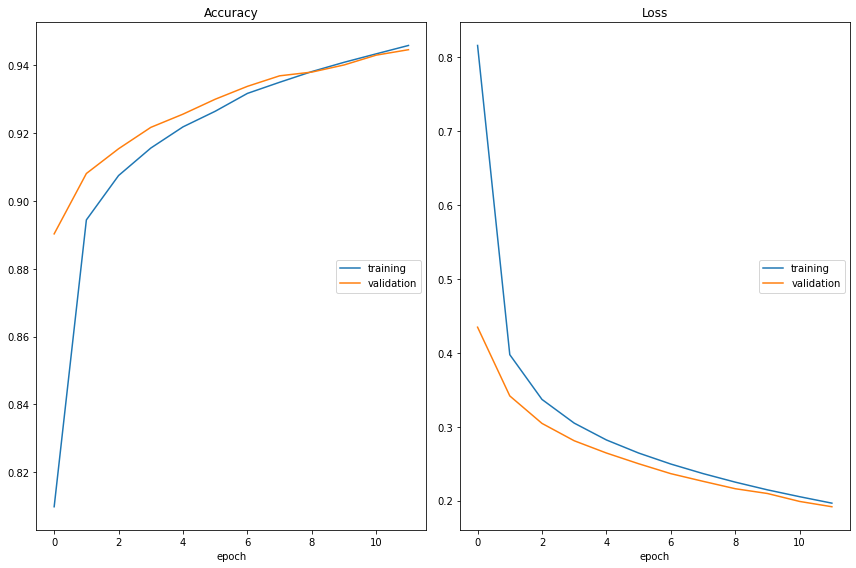

Accuracy
	training         	 (min:    0.810, max:    0.946, cur:    0.946)
	validation       	 (min:    0.890, max:    0.945, cur:    0.945)
Loss
	training         	 (min:    0.197, max:    0.816, cur:    0.197)
	validation       	 (min:    0.192, max:    0.435, cur:    0.192)
938/938 [==============================] - 4s 4ms/step - loss: 0.1966 - acc: 0.9459 - val_loss: 0.1917 - val_acc: 0.9446
Test loss: 0.1917155385017395
Test accuracy: 0.944599986076355


In [310]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
model.compile(optimizer=keras.optimizers.SGD() , loss= keras.losses.categorical_crossentropy, metrics=['acc'])

# categorical, binary, sparse - important entropies

model.fit(x_train, y_train, epochs = 12,batch_size=64,callbacks=[plot_losses],verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [311]:
937.5*64

60000.0

In [312]:
??model.fit

In [313]:
60000/64

937.5

In [314]:
x_test = x_test / 255.0

7


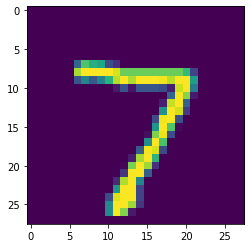

In [315]:
plt.imshow(x_test[0])

print(y_test0[0])

In [316]:
model.input_shape

(None, 28, 28)

In [317]:
import numpy as np

In [318]:
testimage = np.expand_dims(x_test[0], axis=0)  # Introduces more dimensionality to the data

In [319]:
x_test[0].shape, testimage.shape

((28, 28), (1, 28, 28))

In [320]:


model.predict(testimage)

array([[0.07462596, 0.11950094, 0.09245539, 0.07847782, 0.10312477,
        0.16753677, 0.0876993 , 0.14030395, 0.05303142, 0.08324364]],
      dtype=float32)

In [321]:
np.argmax(model.predict(testimage))

5

In [322]:
x_test.shape 

(10000, 28, 28)

In [323]:
y_predicted = model.predict(x_test) 

In [324]:
y_predicted

array([[0.07462596, 0.11950094, 0.0924554 , ..., 0.14030392, 0.05303142,
        0.08324364],
       [0.07576136, 0.12358967, 0.09450117, ..., 0.1295659 , 0.0539062 ,
        0.07969656],
       [0.07336452, 0.12518269, 0.09254465, ..., 0.13495648, 0.05348824,
        0.08241364],
       ...,
       [0.07307268, 0.1206993 , 0.09119822, ..., 0.13648702, 0.05326535,
        0.08362202],
       [0.07412472, 0.12323707, 0.09091561, ..., 0.13245447, 0.05410076,
        0.08190934],
       [0.0753697 , 0.12041638, 0.09401226, ..., 0.13291551, 0.05280055,
        0.08060639]], dtype=float32)

In [325]:
y_predicted[0]

array([0.07462596, 0.11950094, 0.0924554 , 0.07847781, 0.10312477,
       0.16753678, 0.08769931, 0.14030392, 0.05303142, 0.08324364],
      dtype=float32)

In [326]:
np.argmax(y_predicted[0])

5

In [327]:
y_pred = np.argmax(y_predicted, axis=1) # axis = 1 runs the function on each row

In [328]:
(y_pred == y_test0)

array([False, False, False, ..., False,  True, False])

In [329]:
y_test0

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [330]:
(y_pred == y_test0).sum()

892

In [331]:
np.where(y_pred != y_test0)

(array([   0,    1,    2, ..., 9996, 9997, 9999]),)

5
5


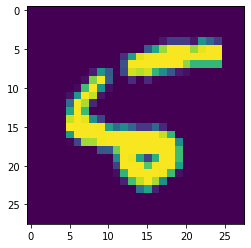

In [332]:
plt.imshow(x_test[8])
print(y_test0[8])
print(y_pred[8])

3
5


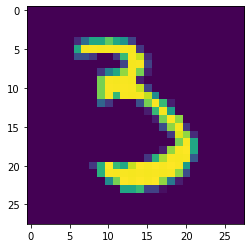

In [333]:
plt.imshow(x_test[3110])
print(y_test0[3110])
print(y_pred[3110])

7
5


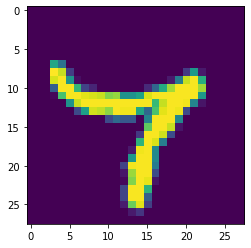

In [334]:
plt.imshow(x_test[124])
print(y_test0[124])
print(y_pred[124])